Preparing the data

In [32]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [33]:
data = pd.read_csv("DNN_data.csv", parse_dates = ["time"], index_col = "time")
symbol = data.columns[0]
data["returns"] = np.log(data[symbol] / data[symbol].shift())
data

,EUR_USD,returns
time,,
2017-01-02 23:20:00,1.04574,NaN
2017-01-02 23:40:00,1.04608,0.00033
2017-01-03 00:00:00,1.04575,-0.00032
2017-01-03 00:20:00,1.04672,0.00093
2017-01-03 00:40:00,1.04696,0.00023
...,...,...
2019-12-30 23:00:00,1.12012,0.00008
2019-12-30 23:20:00,1.12030,0.00016
2019-12-30 23:40:00,1.12018,-0.00011


Adding lables/features to the data

In [34]:
window = 50
df = data.copy()
#Creates the direction feature
df["dir"] = np.where(df["returns"] > 0, 1, 0)
#Created a feature based on a simple moving average
df["sma"] = df[symbol].rolling(window).mean() - df[symbol].rolling(150).mean()
#Creates a feature based on bollinger bands
df["boll"] = (df[symbol] - df[symbol].rolling(window).mean()) / df[symbol].rolling(window).std()
#Creates a feature based on the min price in a 20min time print
df["min"] = df[symbol].rolling(window).min() / df[symbol] - 1
#Creates a feature based in the max price in a 20min time print
df["max"] = df[symbol].rolling(window).max() / df[symbol] - 1
#Creates a feature based on momentum
df["mom"] = df["returns"].rolling(3).mean()
#Created a feature based on the trading volume in a given 20min time print
df["vol"] = df["returns"].rolling(window).std()
df.dropna(inplace = True)
df

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol
time,,,,,,,,,
2017-01-05 01:00:00,1.05406,0.00173,1,0.00275,2.77761,-0.01095,0.00000,0.00138,0.00080
2017-01-05 01:20:00,1.05226,-0.00171,0,0.00290,2.00028,-0.00905,0.00171,-0.00010,0.00084
2017-01-05 01:40:00,1.05138,-0.00084,0,0.00302,1.60440,-0.00822,0.00255,-0.00027,0.00085
2017-01-05 02:00:00,1.05196,0.00055,1,0.00314,1.71886,-0.00876,0.00200,-0.00066,0.00085
2017-01-05 02:20:00,1.05230,0.00032,1,0.00327,1.74272,-0.00908,0.00167,0.00001,0.00085
...,...,...,...,...,...,...,...,...,...
2019-12-30 23:00:00,1.12012,0.00008,1,0.00316,0.11606,-0.00136,0.00145,0.00006,0.00041
2019-12-30 23:20:00,1.12030,0.00016,1,0.00312,0.33557,-0.00152,0.00129,-0.00003,0.00040
2019-12-30 23:40:00,1.12018,-0.00011,0,0.00306,0.15542,-0.00141,0.00139,0.00004,0.00039


Adding feature lags to the dataset

In [35]:
lags = 5
cols = []
features = ["dir", "sma", "boll", "min", "max", "mom", "vol"]
for f in features:
        for lag in range(1, lags + 1):
            col = "{}_lag_{}".format(f, lag)
            df[col] = df[f].shift(lag)
            cols.append(col)
df.dropna(inplace = True)
df

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-01-05 02:40:00,1.05124,-0.00101,0,0.00339,1.32277,-0.00809,0.00268,-0.00004,0.00086,1.00000,...,0.00001,-0.00066,-0.00027,-0.00010,0.00138,0.00085,0.00085,0.00085,0.00084,0.00080
2017-01-05 03:00:00,1.05150,0.00025,1,0.00351,1.35516,-0.00833,0.00243,-0.00015,0.00086,0.00000,...,-0.00004,0.00001,-0.00066,-0.00027,-0.00010,0.00086,0.00085,0.00085,0.00085,0.00084
2017-01-05 03:20:00,1.05230,0.00076,1,0.00365,1.55709,-0.00908,0.00167,-0.00000,0.00086,1.00000,...,-0.00015,-0.00004,0.00001,-0.00066,-0.00027,0.00086,0.00086,0.00085,0.00085,0.00085
2017-01-05 03:40:00,1.05192,-0.00036,0,0.00380,1.37543,-0.00873,0.00203,0.00022,0.00086,1.00000,...,-0.00000,-0.00015,-0.00004,0.00001,-0.00066,0.00086,0.00086,0.00086,0.00085,0.00085
2017-01-05 04:00:00,1.05204,0.00011,1,0.00392,1.35764,-0.00884,0.00192,0.00017,0.00085,0.00000,...,0.00022,-0.00000,-0.00015,-0.00004,0.00001,0.00086,0.00086,0.00086,0.00086,0.00085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:00:00,1.12012,0.00008,1,0.00316,0.11606,-0.00136,0.00145,0.00006,0.00041,0.00000,...,-0.00007,0.00007,0.00002,0.00010,0.00010,0.00041,0.00041,0.00040,0.00040,0.00040
2019-12-30 23:20:00,1.12030,0.00016,1,0.00312,0.33557,-0.00152,0.00129,-0.00003,0.00040,1.00000,...,0.00006,-0.00007,0.00007,0.00002,0.00010,0.00041,0.00041,0.00041,0.00040,0.00040
2019-12-30 23:40:00,1.12018,-0.00011,0,0.00306,0.15542,-0.00141,0.00139,0.00004,0.00039,1.00000,...,-0.00003,0.00006,-0.00007,0.00007,0.00002,0.00040,0.00041,0.00041,0.00041,0.00040


Splitting the data into a train and a test set

In [36]:
split = int(len(df)*0.66)
split

36716

In [37]:
train = df.iloc[:split].copy()
train

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-01-05 02:40:00,1.05124,-0.00101,0,0.00339,1.32277,-0.00809,0.00268,-0.00004,0.00086,1.00000,...,0.00001,-0.00066,-0.00027,-0.00010,0.00138,0.00085,0.00085,0.00085,0.00084,0.00080
2017-01-05 03:00:00,1.05150,0.00025,1,0.00351,1.35516,-0.00833,0.00243,-0.00015,0.00086,0.00000,...,-0.00004,0.00001,-0.00066,-0.00027,-0.00010,0.00086,0.00085,0.00085,0.00085,0.00084
2017-01-05 03:20:00,1.05230,0.00076,1,0.00365,1.55709,-0.00908,0.00167,-0.00000,0.00086,1.00000,...,-0.00015,-0.00004,0.00001,-0.00066,-0.00027,0.00086,0.00086,0.00085,0.00085,0.00085
2017-01-05 03:40:00,1.05192,-0.00036,0,0.00380,1.37543,-0.00873,0.00203,0.00022,0.00086,1.00000,...,-0.00000,-0.00015,-0.00004,0.00001,-0.00066,0.00086,0.00086,0.00086,0.00085,0.00085
2017-01-05 04:00:00,1.05204,0.00011,1,0.00392,1.35764,-0.00884,0.00192,0.00017,0.00085,0.00000,...,0.00022,-0.00000,-0.00015,-0.00004,0.00001,0.00086,0.00086,0.00086,0.00086,0.00085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-23 23:40:00,1.13718,0.00006,1,-0.00202,-0.94581,-0.00113,0.00890,0.00020,0.00078,1.00000,...,0.00025,-0.00009,0.00013,0.00009,0.00038,0.00078,0.00078,0.00078,0.00078,0.00078
2018-12-24 00:00:00,1.13724,0.00005,1,-0.00219,-0.89554,-0.00119,0.00885,0.00011,0.00078,1.00000,...,0.00020,0.00025,-0.00009,0.00013,0.00009,0.00078,0.00078,0.00078,0.00078,0.00078
2018-12-24 00:20:00,1.13755,0.00027,1,-0.00237,-0.77108,-0.00146,0.00857,0.00013,0.00077,1.00000,...,0.00011,0.00020,0.00025,-0.00009,0.00013,0.00078,0.00078,0.00078,0.00078,0.00078


In [38]:
test = df.iloc[split:].copy()
test

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2018-12-24 01:20:00,1.13780,-0.00004,0,-0.00290,-0.61860,-0.00168,0.00582,0.00007,0.00076,1.00000,...,0.00018,0.00015,0.00013,0.00011,0.00020,0.00077,0.00077,0.00077,0.00078,0.00078
2018-12-24 01:40:00,1.13770,-0.00009,0,-0.00303,-0.62974,-0.00159,0.00466,0.00000,0.00073,0.00000,...,0.00007,0.00018,0.00015,0.00013,0.00011,0.00076,0.00077,0.00077,0.00077,0.00078
2018-12-24 02:00:00,1.13806,0.00032,1,-0.00313,-0.45011,-0.00191,0.00418,0.00006,0.00072,0.00000,...,0.00000,0.00007,0.00018,0.00015,0.00013,0.00073,0.00076,0.00077,0.00077,0.00077
2018-12-24 02:20:00,1.13791,-0.00013,0,-0.00322,-0.48362,-0.00178,0.00431,0.00003,0.00072,1.00000,...,0.00006,0.00000,0.00007,0.00018,0.00015,0.00072,0.00073,0.00076,0.00077,0.00077
2018-12-24 02:40:00,1.13865,0.00065,1,-0.00331,-0.12870,-0.00242,0.00340,0.00028,0.00072,0.00000,...,0.00003,0.00006,0.00000,0.00007,0.00018,0.00072,0.00072,0.00073,0.00076,0.00077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:00:00,1.12012,0.00008,1,0.00316,0.11606,-0.00136,0.00145,0.00006,0.00041,0.00000,...,-0.00007,0.00007,0.00002,0.00010,0.00010,0.00041,0.00041,0.00040,0.00040,0.00040
2019-12-30 23:20:00,1.12030,0.00016,1,0.00312,0.33557,-0.00152,0.00129,-0.00003,0.00040,1.00000,...,0.00006,-0.00007,0.00007,0.00002,0.00010,0.00041,0.00041,0.00041,0.00040,0.00040
2019-12-30 23:40:00,1.12018,-0.00011,0,0.00306,0.15542,-0.00141,0.00139,0.00004,0.00039,1.00000,...,-0.00003,0.00006,-0.00007,0.00007,0.00002,0.00040,0.00041,0.00041,0.00041,0.00040


Feature standardization

In [39]:
# train set parameters (mu, std) for standardization
mu, std = train.mean(), train.std()
# standardization of train set features
train_s = (train - mu) / std 

Creating the DND model

In [40]:
from DNNModel import *
# fitting a DNN model with 3 Hidden Layers (50 nodes each) and dropout regularization

set_seeds(100)
model = create_model(hl = 3, hu = 50, dropout = True, input_dim = len(cols))
model.fit(x = train_s[cols], y = train["dir"], epochs = 50, verbose = False,
          validation_split = 0.2, shuffle = False, class_weight = cw(train))

model.evaluate(train_s[cols], train["dir"]) # evaluate the fit on the train set
pred = model.predict(train_s[cols]) # prediction (probabilities)
pred

1148/1148 [==============================] - 2s 2ms/step - loss: 0.6904 - accuracy: 0.5332


array([[0.5013227 ],
       [0.5146905 ],
       [0.51872844],
       ...,
       [0.47952425],
       [0.48867837],
       [0.48363674]], dtype=float32)

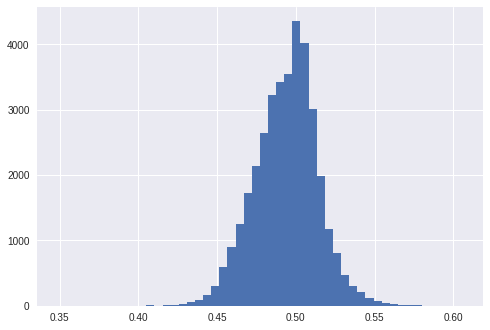

In [41]:
#Shows the distribution of predictions#
plt.hist(pred, bins = 50)
plt.show()

Out-sample prediction and forward testing

In [42]:
test_s = (test - mu) / std # standardization of test set features (with train set parameters!!!)
model.evaluate(test_s[cols], test["dir"])
pred = model.predict(test_s[cols])

592/592 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5191


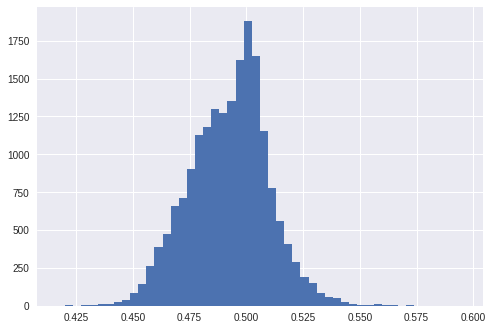

In [43]:
#Plotting a histogram of prediction values
plt.hist(pred, bins = 50);

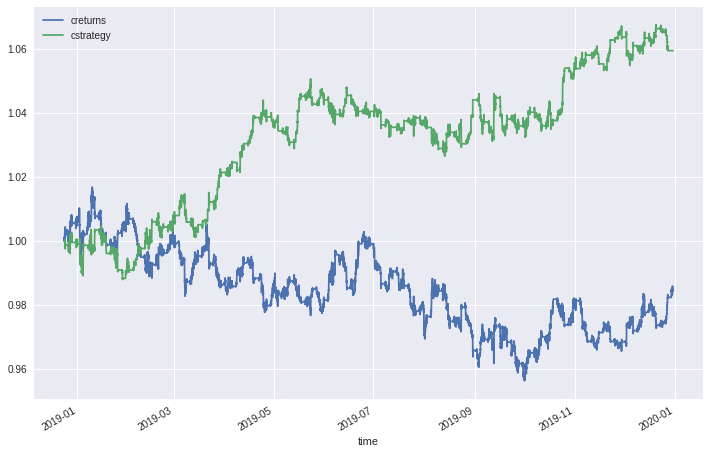

In [44]:
#Setting the condition in which to place a trade
test["proba"] = model.predict(test_s[cols])
test["position"] = np.where(test.proba < 0.47, -1, np.nan) # 1. short where proba < 0.47
test["position"] = np.where(test.proba > 0.53, 1, test.position) # 2. long where proba > 0.53
test.index = test.index.tz_localize("UTC")
test["NYTime"] = test.index.tz_convert("America/New_York")
test["hour"] = test.NYTime.dt.hour
test["position"] = np.where(~test.hour.between(2, 12), 0, test.position) # 3. neutral in non-busy hours
test["position"] = test.position.ffill().fillna(0) # 4. in all other cases: hold position
test.position.value_counts(dropna = False)
test["strategy"] = test["position"] * test["returns"]
test["creturns"] = test["returns"].cumsum().apply(np.exp)
test["cstrategy"] = test["strategy"].cumsum().apply(np.exp)
test[["creturns", "cstrategy"]].plot(figsize = (12, 8))
#Plot the trading results before trading costs are added
plt.show()

In [45]:
#Testing with trading costs
ptc = 0.000025
test["trades"] = test.position.diff().abs()
#Display the number of trades taken
test.trades.value_counts()

0.00000    18294
1.00000      514
2.00000      106
Name: trades, dtype: int64

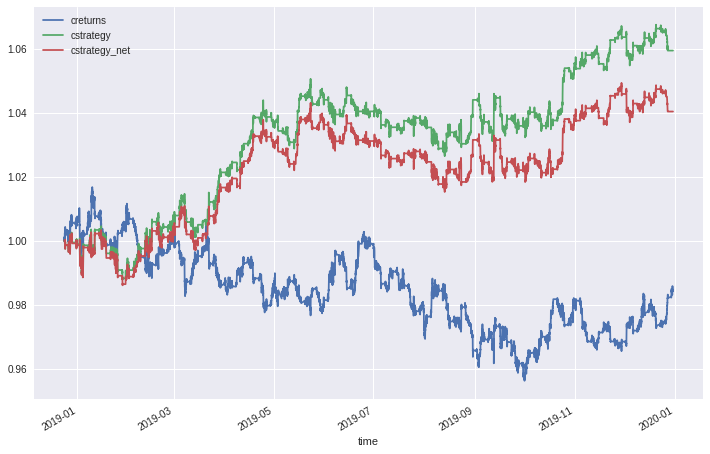

In [46]:
#Plotting the results
test["strategy_net"] = test.strategy - test.trades * ptc
test["cstrategy_net"] = test["strategy_net"].cumsum().apply(np.exp)
test[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12, 8))
plt.show()

Code to save the model and the parameters

In [ ]:
model.save("DNN_model")
import pickle
params = {"mu":mu, "std":std}
pickle.dump(params, open("params.pkl", "wb"))

Connecting the trading bot to the broker and setting the trading conditions

In [ ]:
import pandas as pd
import numpy as np
import tpqoa
import fxcmpy
from datetime import datetime, timedelta
import time

In [ ]:
# Loading the model
import keras
model = keras.models.load_model("DNN_model")
# Loading mu and std
import pickle
params = pickle.load(open("params.pkl", "rb"))
mu = params["mu"]
std = params["std"]

In [ ]:
class DNNTrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length, window, lags, model, mu, std, units):
        super().__init__(conf_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()
        self.raw_data = None
        self.data = None 
        self.last_bar = None
        self.units = units
        self.position = 0
        self.profits = []
        
        #*****************add strategy-specific attributes here******************
        self.window = window
        self.lags = lags
        self.model = model
        self.mu = mu
        self.std = std
        #************************************************************************
    
    def get_most_recent(self, days = 5):
        while True:
            time.sleep(2)
            now = datetime.utcnow()
            now = now - timedelta(microseconds = now.microsecond)
            past = now - timedelta(days = days)
            df = self.get_history(instrument = self.instrument, start = past, end = now,
                                   granularity = "S5", price = "M").c.dropna().to_frame()
            df.rename(columns = {"c":self.instrument}, inplace = True)
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.utcnow()) - self.last_bar < self.bar_length:
                self.start_time = pd.to_datetime(datetime.utcnow()).tz_localize("UTC") # NEW -> Start Time of Trading Session
                break
                
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ", flush = True)
        
        recent_tick = pd.to_datetime(datetime.utcnow())
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick])
        self.tick_data = self.tick_data.append(df)
        if recent_tick - self.last_bar > self.bar_length:
            self.resample_and_join()
            self.define_strategy()
            self.execute_trades()
    
    def resample_and_join(self):
        self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length, 
                                                                  label="right").last().ffill().iloc[:-1])
        self.tick_data = self.tick_data.iloc[-1:]
        self.last_bar = self.raw_data.index[-1]
    
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        #create features
        df = df.append(self.tick_data) # append latest tick (== open price of current bar)
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        df["dir"] = np.where(df["returns"] > 0, 1, 0)
        df["sma"] = df[self.instrument].rolling(self.window).mean() - df[self.instrument].rolling(150).mean()
        df["boll"] = (df[self.instrument] - df[self.instrument].rolling(self.window).mean()) / df[self.instrument].rolling(self.window).std()
        df["min"] = df[self.instrument].rolling(self.window).min() / df[self.instrument] - 1
        df["max"] = df[self.instrument].rolling(self.window).max() / df[self.instrument] - 1
        df["mom"] = df["returns"].rolling(3).mean()
        df["vol"] = df["returns"].rolling(self.window).std()
        df.dropna(inplace = True)
        
        # create lags
        self.cols = []
        features = ["dir", "sma", "boll", "min", "max", "mom", "vol"]

        for f in features:
            for lag in range(1, self.lags + 1):
                col = "{}_lag_{}".format(f, lag)
                df[col] = df[f].shift(lag)
                self.cols.append(col)
        df.dropna(inplace = True)
        
        # standardization
        df_s = (df - self.mu) / self.std
        # predict
        df["proba"] = self.model.predict(df_s[self.cols])
        
        #determine positions
        df = df.loc[self.start_time:].copy() # starting with first live_stream bar (removing historical bars)
        df["position"] = np.where(df.proba < 0.47, -1, np.nan)
        df["position"] = np.where(df.proba > 0.53, 1, df.position)
        df["position"] = df.position.ffill().fillna(0) # start with neutral position if no strong signal
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING LONG")
            elif self.position == -1:
                order = self.create_order(self.instrument, self.units * 2, suppress = True, ret = True) 
                self.report_trade(order, "GOING LONG")
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units * 2, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: 
            if self.position == -1:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True) 
                self.report_trade(order, "GOING NEUTRAL")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING NEUTRAL")
            self.position = 0
    
    def report_trade(self, order, going):
        time = order["time"]
        units = order["units"]
        price = order["price"]
        pl = float(order["pl"])
        self.profits.append(pl)
        cumpl = sum(self.profits)
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | P&L = {} | Cum P&L = {}".format(time, units, price, pl, cumpl))
        print(100 * "-" + "\n")  

In [ ]:
trader = DNNTrader("oanda.cfg", "EUR_USD", bar_length = "20min",
                   window = 50, lags = 5, model = model, mu = mu, std = std, units = 100)

In [ ]:
trader.get_most_recent()
trader.stream_data(trader.instrument, stop = 1000)
if trader.position != 0:
    close_order = trader.create_order(trader.instrument, units = -trader.position * trader.units,
                                      suppress = True, ret = True) 
    trader.report_trade(close_order, "GOING NEUTRAL")
    trader.position = 0